<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---



TRAI has a Portal called "TRAI Analytics" which upload the broadband speedtest performed by end users as well as TRAI's own diagnotics. Every month TRAI uploads a file with sampling of broadband performance across all the telecom circles spanning every Service Providers. 

**Context for this analysis**
As per TRAI's report, India witnessed 18% jump in internet broadband in India in march 2021. YoY growth is very impressive so question is : are the Internet Service Providers giving good internet speeds and are they scaled up to support the large ever growing customer base in India. There has been numerous surveys pointing to growth of online commerce in tier 2, tier 3 cities in India. 
https://trai.gov.in/sites/default/files/Annual_Report_06042022_0.pdf

So this is an effort to analyse the performance of 3G and 4G Broadband in India based on this sampling of the speedtest. It is a study of the major Telecom Service Providers licensed by TRAI. 

---
<a name = Section2></a>
# **2. Problem Statement**
---

  - In the last few years India has seen explosive growth in online banking, ecommerce, Social media consumption and availability of online  government related services enabling "ease of living" concept.

  - Penetration of mobile phones in urban as well as rural India been phenomenal. A huge customer base has been discovered.

  - Telecom Service Providers/Operators had bought 4G licenses and have invested in the required infrastructure.

  - Telecom has become the harbinger of India's economic power

  - Demand for online/broadband is growing but are the Telcos giving good  Broadband speed across the country?
  - Are the private players able to give good speed compared to State players?
  - To understand this issue, we will do EDA on the data available at TRAI Analytics portal.


---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [ ]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# To install more libraries insert your code here..


### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling                          # Upgrading pandas profiling to the latest version

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Initially I was working from my google drive where I had downloaded speedtest files, hence code to connect.
# In the final version, I have accessed the files directly from TRAI site
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


|Id|Feature|Description|
|:--|:--|:--|
|01| service_provider                 | A text value uniquely identifying the telco provider.|
|02| technology                    | 3G or 4G.|
|03| test_type                | whether upload or download|
|04| data_speed               | Broadband speed.| 
|05| signal_strength              | Indicates strength of telecom signal.|
|06| lsa                 | licensed telecom circle of the telecom provider.| 
|07| month                 | derived feature to indicate month when the reading was taken.|


In [2]:
# We will upload the 7 months of data from TRAI Analytics, for identifying records, new feature indicating month of reading has been added

dataJan22 = pd.read_csv(filepath_or_buffer = 'https://myspeed.trai.gov.in/download/jan22_publish.csv')
dataJan22['month']=202201
datafeb22 = pd.read_csv(filepath_or_buffer = 'https://myspeed.trai.gov.in/download/feb22_publish.csv')
datafeb22['month']=202202
datamar22 = pd.read_csv(filepath_or_buffer = 'https://myspeed.trai.gov.in/download/march22_publish.csv')
datamar22['month']=202203
dataapr22 = pd.read_csv(filepath_or_buffer = 'https://myspeed.trai.gov.in/download/april22_publish.csv')
dataapr22['month']=202204
dataMay22 = pd.read_csv(filepath_or_buffer = 'https://myspeed.trai.gov.in/download/may22_publish.csv')
dataMay22['month']=202205
dataJun22 = pd.read_csv(filepath_or_buffer = 'https://myspeed.trai.gov.in/download/june22_publish.csv')
dataJun22['month']=202206 
dataJul22 = pd.read_csv(filepath_or_buffer = 'https://myspeed.trai.gov.in/download/july22_publish.csv')
dataJul22['month']=202207

# We will merge the 7 months data into a single DataFrame for analysis
consolidated2022 = pd.concat([dataJan22, datafeb22, datamar22, dataapr22, dataMay22, dataJun22, dataJul22], axis=0, join="outer")
consolidated2022.tail()

,service_provider,technology,test_type,data_speed,signal_strength,lsa,month
565615,AIRTEL,4G,download,2876.0,-107,NaN,202207
565616,AIRTEL,4G,download,3754.0,-102,NaN,202207
565617,AIRTEL,4G,download,13628.0,-79,NaN,202207
565618,AIRTEL,4G,download,3385.0,-109,NaN,202207
565619,JIO,4G,download,61881.0,-61,Orissa,202207


In [3]:
print('Data Shape:', consolidated2022.shape)
consolidated2022.columns

Data Shape: (4271439, 7)


Index(['service_provider', 'technology', 'test_type', 'data_speed',
       'signal_strength', 'lsa', 'month'],
      dtype='object')

### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [4]:
# check if any column has null values
consolidated2022.info(show_counts="Y")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4271439 entries, 0 to 565619
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   service_provider  4271439 non-null  object 
 1   technology        4271439 non-null  object 
 2   test_type         4271439 non-null  object 
 3   data_speed        4271439 non-null  float64
 4   signal_strength   4271439 non-null  object 
 5   lsa               1524343 non-null  object 
 6   month             4271439 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 260.7+ MB


It is observed that there are about 2747096 records with missing lsa column. So these records do not have the licensed circle for the telco. 
We cannot delete these records as it more than 50% of the total records. Hence we will take the approach of defaulting as service_provider_other. For eg, JIO_other. 
Also noticed signal_strength has dtype of object. It should be int as signal strength is a number.

In [5]:
# Let us see what the columns describe
pd.unique(consolidated2022['service_provider'])

array(['Vi India', 'JIO', 'AIRTEL', 'BSNL', 'CELLONE'], dtype=object)

In [6]:
pd.unique(consolidated2022['technology'])

array(['4G', '3G'], dtype=object)

In [7]:
pd.unique(consolidated2022['test_type'])

array(['download', 'upload'], dtype=object)

In [8]:
pd.unique(consolidated2022['lsa'])

array([nan, 'UP East', 'Kerala', 'Maharashtra', 'Andhra Pradesh',
       'Mumbai', 'Karnataka', 'Rajasthan', 'Haryana', 'Madhya Pradesh',
       'Kolkata', 'Punjab', 'Tamil Nadu', 'Bihar', 'Chennai', 'Gujarat',
       'Orissa', 'Assam', 'Delhi', 'UP West', 'Jammu & Kashmir',
       'Himachal Pradesh', 'West Bengal', 'North East'], dtype=object)

There are 5 telecom operators in the data. There are 23 telecom circles and one undefined circle. The dataset contains 4G and 3G broadband service and covers 2 test types :upload and download 

In [9]:
# data_speed is a continous variable and we can describe its distribution
consolidated2022.describe()

,data_speed,month
count,4.271439e+06,4.271439e+06
mean,1.274437e+04,2.022040e+05
std,1.657115e+04,1.948673e+00
min,0.000000e+00,2.022010e+05
25%,2.349000e+03,2.022020e+05
50%,7.023000e+03,2.022040e+05
75%,1.640000e+04,2.022060e+05
max,1.492240e+05,2.022070e+05


### **Data Information**

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [ ]:
#profile = ProfileReport(df = consolidated2022)

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

In [10]:
#lsa has null values so we will replace with service_provider+"_other"
consolidated2022["lsa"].fillna(consolidated2022["service_provider"]+"_other",inplace=True)
consolidated2022.info(show_counts="Y")
consolidated2022.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4271439 entries, 0 to 565619
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   service_provider  4271439 non-null  object 
 1   technology        4271439 non-null  object 
 2   test_type         4271439 non-null  object 
 3   data_speed        4271439 non-null  float64
 4   signal_strength   4271439 non-null  object 
 5   lsa               4271439 non-null  object 
 6   month             4271439 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 260.7+ MB


,service_provider,technology,test_type,data_speed,signal_strength,lsa,month
0,Vi India,4G,download,74864.0,-100,Vi India_other,202201
1,Vi India,4G,download,46072.0,-104,UP East,202201
2,Vi India,4G,upload,10598.0,-100,Vi India_other,202201
3,Vi India,4G,upload,2218.0,-104,UP East,202201
4,JIO,4G,download,7576.0,-111,Kerala,202201


In [11]:
# Sorting the data by Service_provider and lsa.
consolidated2022.sort_values(["service_provider", "lsa"], axis=0, inplace=True )
consolidated2022.head()

,service_provider,technology,test_type,data_speed,signal_strength,lsa,month
43,AIRTEL,4G,upload,13849.0,-100,AIRTEL_other,202201
44,AIRTEL,4G,upload,1346.0,-111,AIRTEL_other,202201
45,AIRTEL,4G,upload,25472.0,-79,AIRTEL_other,202201
46,AIRTEL,4G,upload,8968.0,-100,AIRTEL_other,202201
47,AIRTEL,4G,upload,2975.0,-104,AIRTEL_other,202201


In [12]:
#Signal_strength should be converted to int so we can analyse it, so lets check if the values are all integer
# compatible. There is na value which needs to be converted to proper integer.

consolidated2022['signal_strength'].value_counts()

-90     360033
na      339269
-97     128343
-105    121471
-103    121276
         ...  
-55       2895
-54       2416
-53       1672
-52       1023
-50        484
Name: signal_strength, Length: 64, dtype: int64

In [13]:
# Since signal_strength has negative sign, we can consider default as '-999' to replace 'na'.
consolidated2022['signal_strength'][consolidated2022['signal_strength']=='na'] = '-999'
consolidated2022['signal_strength'] = consolidated2022['signal_strength'].astype('int')

       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# lets check info() again
consolidated2022.info(show_counts="Y")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4271439 entries, 43 to 558274
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   service_provider  4271439 non-null  object 
 1   technology        4271439 non-null  object 
 2   test_type         4271439 non-null  object 
 3   data_speed        4271439 non-null  float64
 4   signal_strength   4271439 non-null  int64  
 5   lsa               4271439 non-null  object 
 6   month             4271439 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 260.7+ MB


In [15]:
consolidated2022.describe()

,data_speed,signal_strength,month
count,4.271439e+06,4.271439e+06,4.271439e+06
mean,1.274437e+04,-1.657049e+02,2.022040e+05
std,1.657115e+04,2.450424e+02,1.948673e+00
min,0.000000e+00,-9.990000e+02,2.022010e+05
25%,2.349000e+03,-1.050000e+02,2.022020e+05
50%,7.023000e+03,-9.600000e+01,2.022040e+05
75%,1.640000e+04,-8.900000e+01,2.022060e+05
max,1.492240e+05,-5.000000e+01,2.022070e+05


---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [16]:
# Post profiling is not required.
consolidated2022.info(show_counts="Y")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4271439 entries, 43 to 558274
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   service_provider  4271439 non-null  object 
 1   technology        4271439 non-null  object 
 2   test_type         4271439 non-null  object 
 3   data_speed        4271439 non-null  float64
 4   signal_strength   4271439 non-null  int64  
 5   lsa               4271439 non-null  object 
 6   month             4271439 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 260.7+ MB


---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

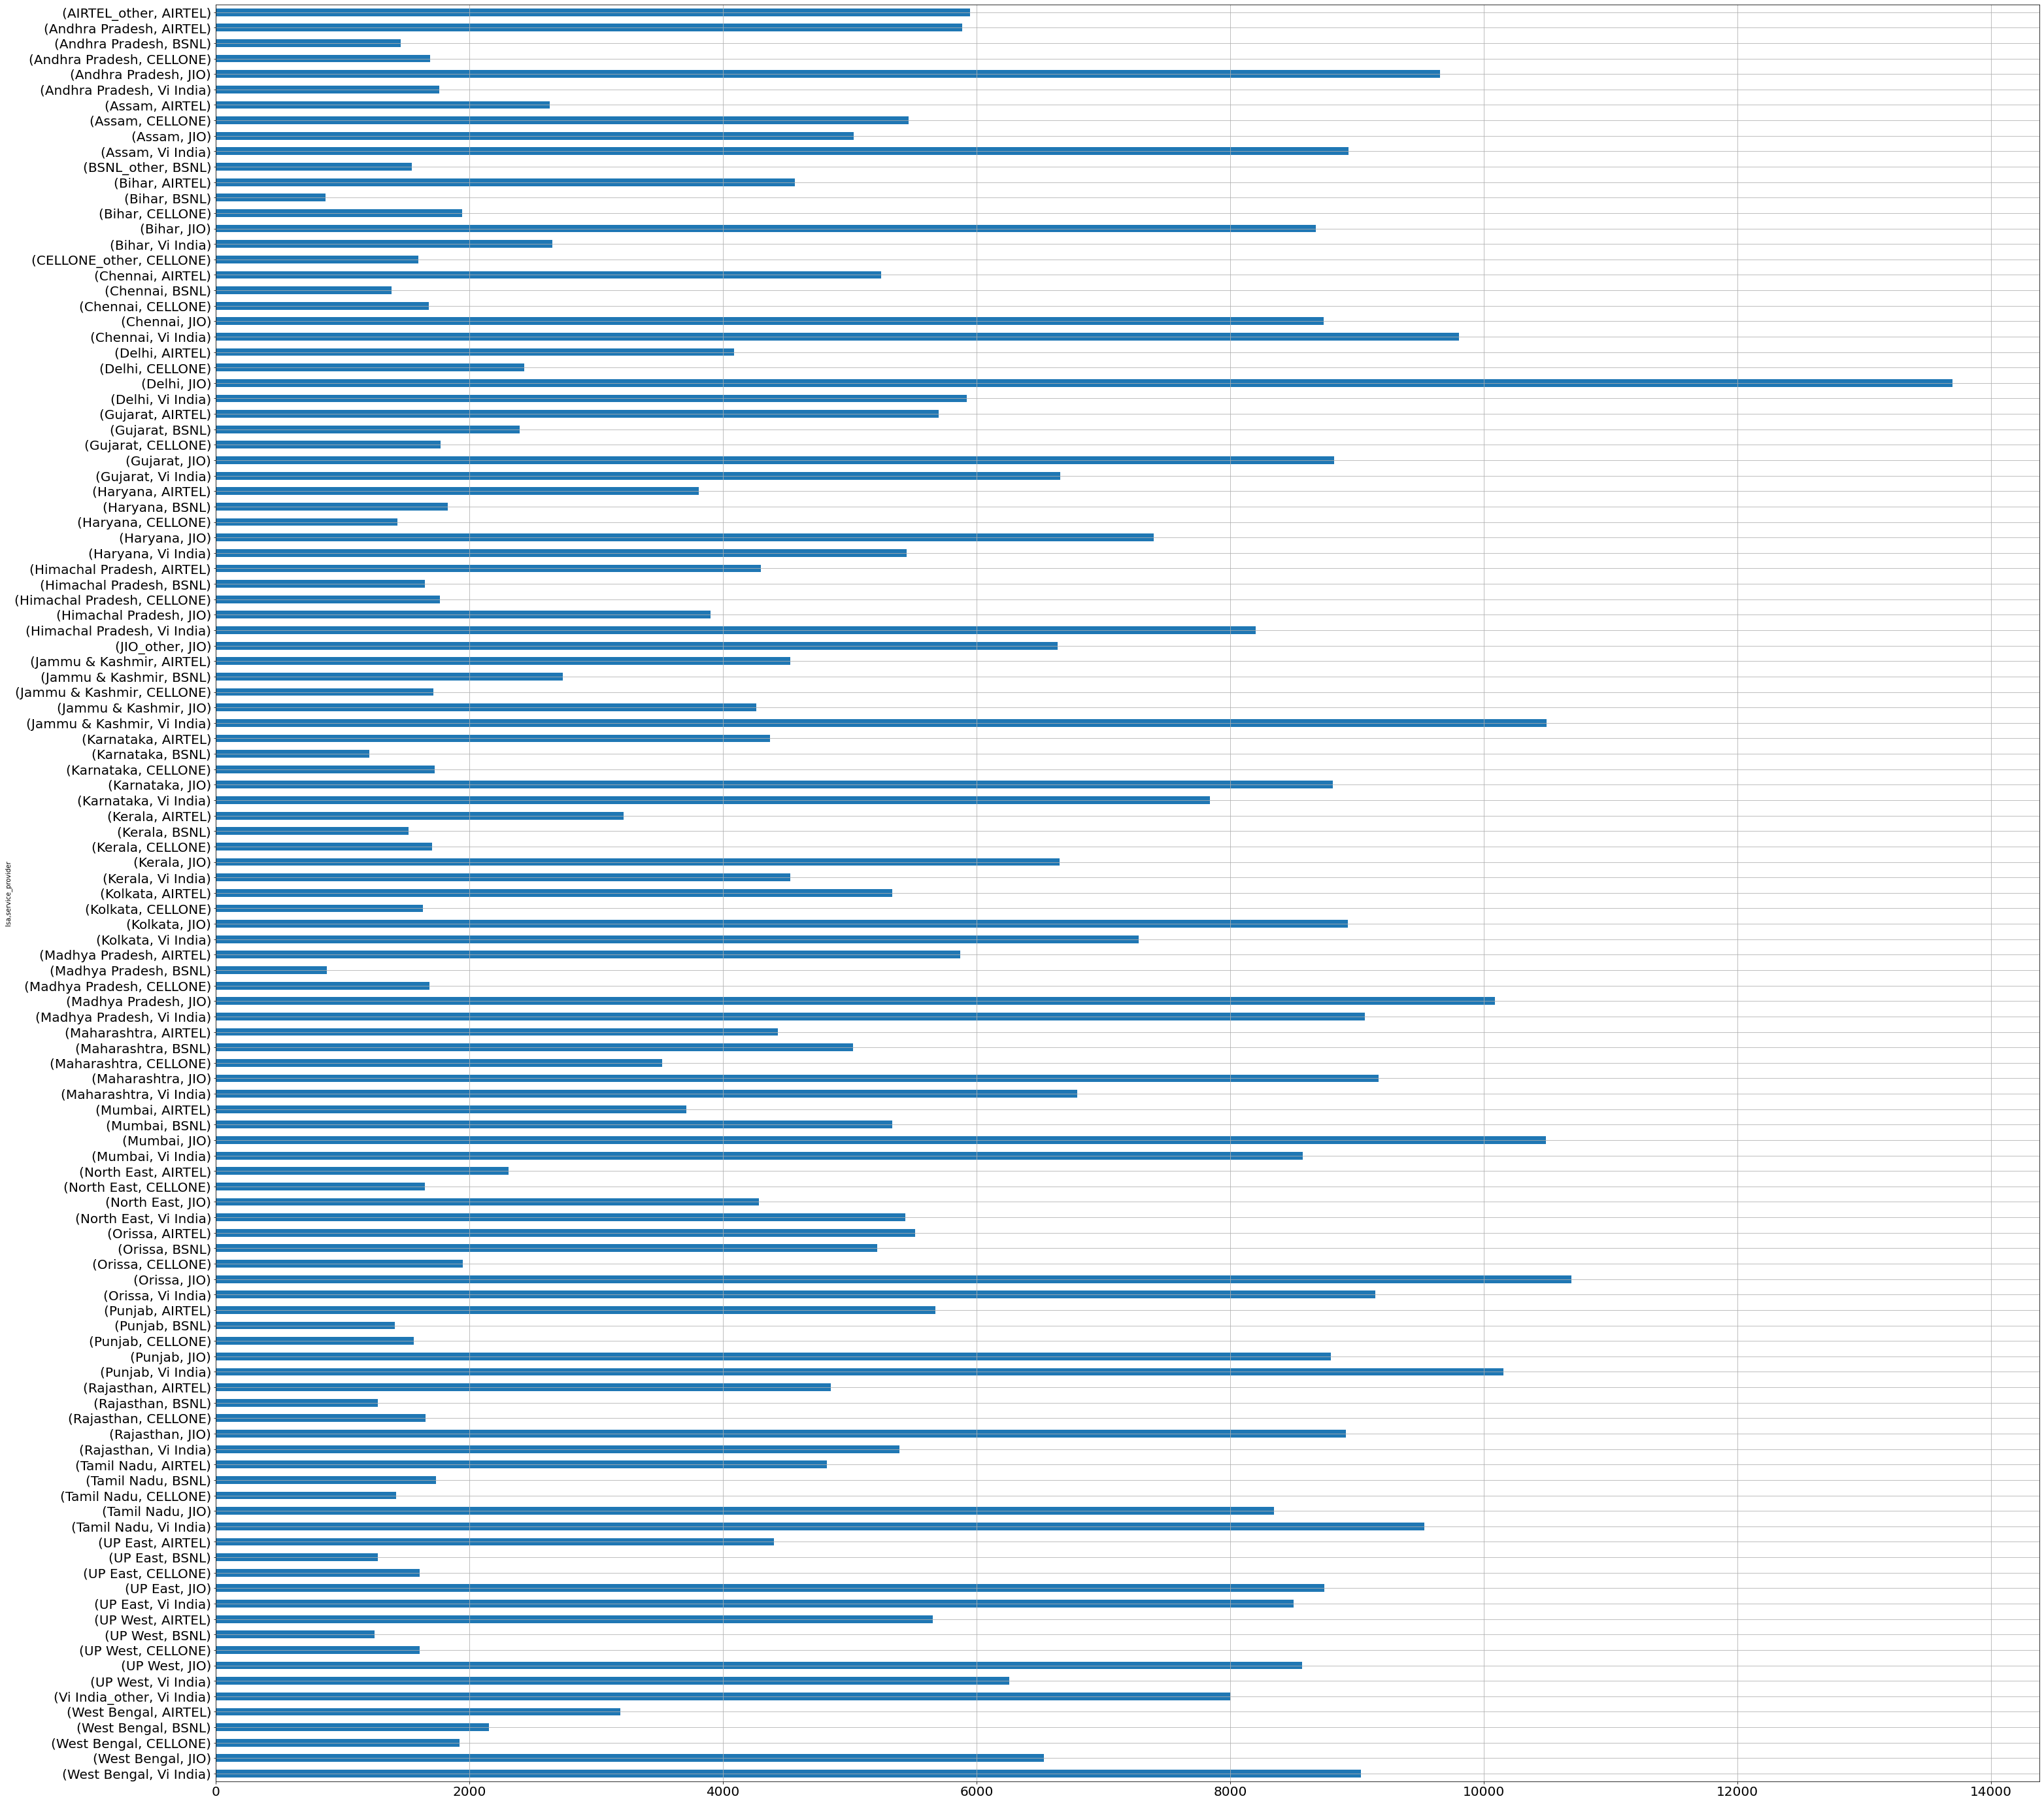

In [17]:
# Now that data is processed, we will analsyse it.
# 1. First let us see relation between data speed and lsa
# sorting by lsa, service_provider, data_speed to see the best and worst performers in each lsa
consolidated2022[["data_speed","lsa","service_provider"]].groupby(["lsa","service_provider"]).median().sort_values(["lsa","service_provider","data_speed"],ascending=False).plot(kind="barh",figsize=(50,50),legend=False,grid=True,fontsize=20)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa205454550>],
      dtype=object)

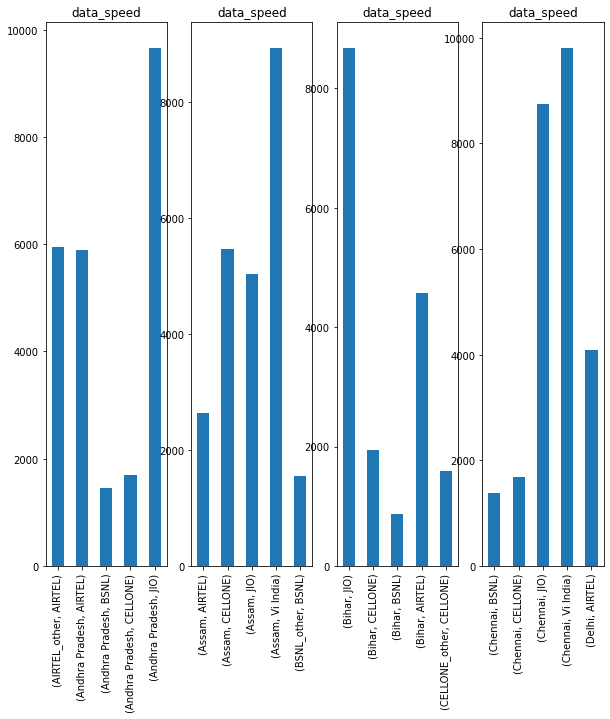

In [18]:
# We can also breakdown by individual lsa. As example I have shown 4 lsa.
fig = plt.figure(figsize=[10, 10])
ax1 = fig.add_subplot(1,3,1)
plt.subplot(1,4,1)
consolidated2022[["data_speed","lsa","service_provider"]].groupby(by=["lsa","service_provider"]).median().sort_values(["lsa"]).iloc[0:5].plot(kind="bar",figsize=(2,2),subplots=True,ax=plt.gca(),xlabel="",legend=False)
plt.subplot(1,4,2)
consolidated2022[["data_speed","lsa","service_provider"]].groupby(by=["lsa","service_provider"]).median().sort_values(["lsa"]).iloc[6:11].plot(kind="bar",figsize=(2,2),subplots=True,ax=plt.gca(),xlabel="",legend=False)
plt.subplot(1,4,3)
consolidated2022[["data_speed","lsa","service_provider"]].groupby(by=["lsa","service_provider"]).median().sort_values(["lsa"]).iloc[12:17].plot(kind="bar",figsize=(2,2),subplots=True,ax=plt.gca(),xlabel="",legend=False)
plt.subplot(1,4,4)
consolidated2022[["data_speed","lsa","service_provider"]].groupby(by=["lsa","service_provider"]).median().sort_values(["lsa"]).iloc[18:23].plot(kind="bar",figsize=(2,2),subplots=True,ax=plt.gca(),xlabel="",legend=False)


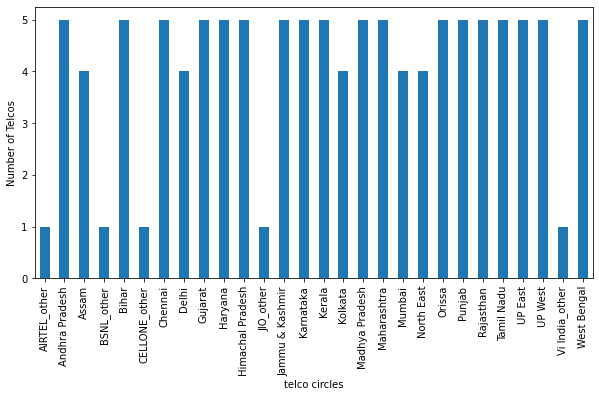

In [19]:
#2. Let us see how many telcos are present in each telco circle
consolidated2022.groupby(["lsa"])["service_provider"].nunique().plot(kind="bar", figsize=(10,5), ylabel="Number of Telcos", xlabel="telco circles")


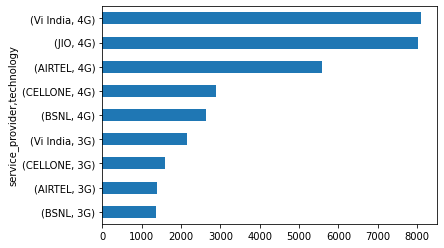

In [20]:
# 3. What are the median data speeds supported by Telcos? 
consolidated2022.groupby(["service_provider", "technology"])["data_speed"].median().sort_values().plot(kind="barh")

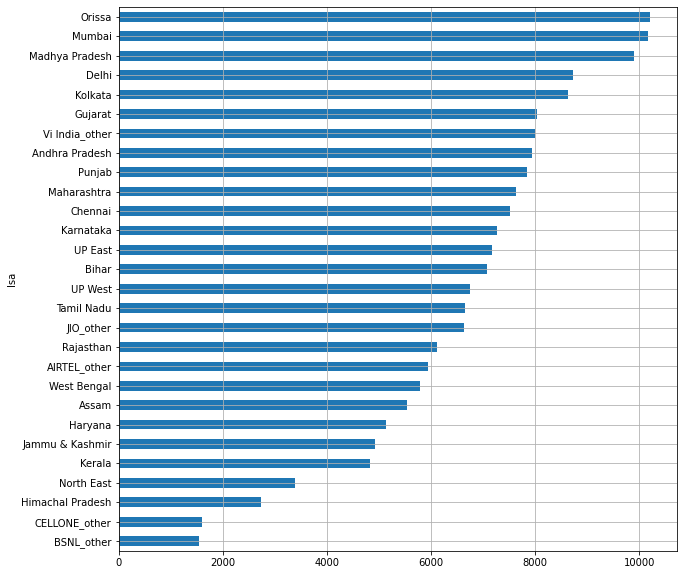

In [21]:
# 4. Which state has the best and worst broadband speeds across all telecom service providers?
consolidated2022.groupby(["lsa"])["data_speed"].median().sort_values().plot(kind="barh", figsize=(10,10),grid=True)

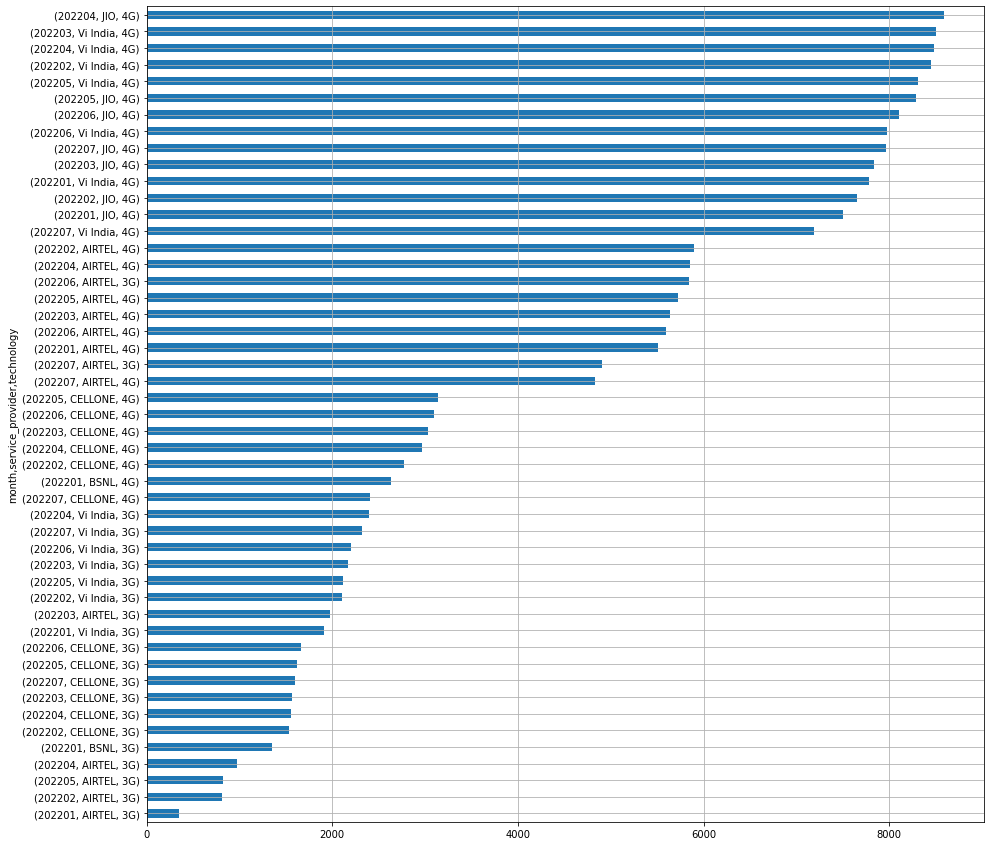

In [22]:
# 4. Do we see any month-wise fluctuations in the data_speed for the telecom service providers?
consolidated2022.groupby(["month", "service_provider","technology"])["data_speed"].median().sort_values().plot(kind="barh",figsize=(15,15),grid=True)


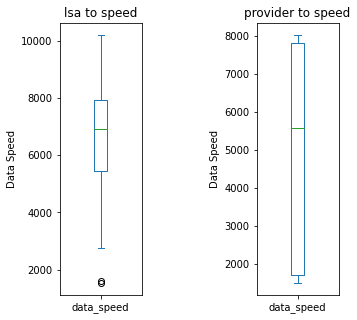

In [23]:
# let us understand the telco providers data-speed box plot to see variation
fig = plt.figure(figsize=[15, 7])
plt.subplot(1,3,1)
consolidated2022.groupby(["lsa"])["data_speed"].median().plot(kind="box",figsize=(5,5),ylabel="Data Speed", title="lsa to speed")
plt.subplot(1,3,3)
consolidated2022.groupby(["service_provider"])["data_speed"].median().plot(kind="box",figsize=(5,5),ylabel="Data Speed", title="provider to speed")
# median data speed across the telecom circles is 5500 kbps thru 8000 kbps. This is also corraborated when we
# see median data speed acros telecom providers though the range is longer 1500 kbps thru 8000 kbps.
# This seems to indicate a consistent coverage across the telecom circles. However the Telecom services providers
# are not able to give consistent speed coverage across the telecom circles they serve.

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**



The exploratory analysis of the data gives few insights into the current 4G and 3G landscape. This data is not exhaustive and is a sampling that TRAI shares on a monthly basis.

1. In 4G technology, JIO and Vi India are the best Telecom Service providers giving highest broadband speeds. 
2. The median broadband speeds for 4G providers shows increase from Jan to Mar and then decrease from April to July. 
3. In 3G technology, VI India is the best service provider giving highest broadband speeds, followed by BSNL/CELLONE.
4. The median broadband speeds for 3G providers shows increase from Jan to Mar and then decrease from April to July.

<a name = Section92></a>
### **9.2 Actionable Insights**

- Further analysis of individual telecom service provider is recommended to understand why there is a large variation in the data speeds across the LSAs served by the service provider
- The speedtest app needs to capture the LSA while taking the readings. Currently 50% of the speedtests do not have it.
- The coverage of speedtest sampling should be expanded to cover LSAs within states like Telangana or Jharkand.